In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('./where_stopped_get_friends_count.txt', 'r') as f:
    WHERE_STOPPED = int(f.read()) 

df = pd.read_csv('./members_df.csv')

friends_count histogram


(array([28263.,   924.,   285.,   143.,   110.,    69.,    71.,    42.,
           30.,    41.]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

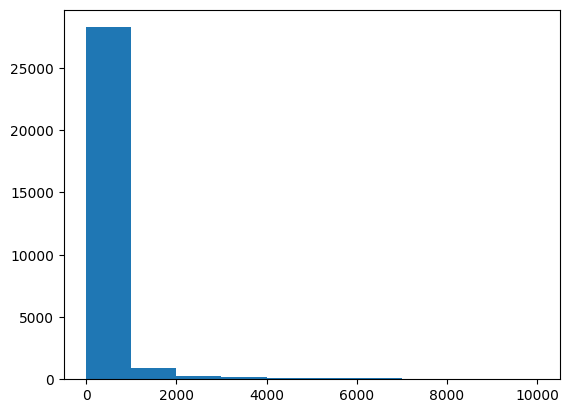

In [27]:
print('friends_count histogram')
plt.hist(df.loc[0:WHERE_STOPPED, 'friends_count'])

In [29]:
print('Top most popular full_names')
df['full_name'].value_counts()[:10]

Top most popular full_names


full_name
Ivan Ivanov             706
Alexander Ivanov        445
Sergey Ivanov           367
Alexander Alexandrov    303
Alexey Ivanov           290
Sergey Sergeev          277
Dmitry Ivanov           249
Andrey Ivanov           245
Andrey Andreev          227
Alexey Alexeev          222
Name: count, dtype: int64

In [33]:
nonan_df = df.fillna(np.nan).replace([np.nan], [None])

nonan_df['city'] = [eval(d)['title'] if d else None for d in nonan_df['town']]

print('Top 10 most popular cities')
nonan_df['city'].value_counts()[:10]

Top 10 most popular cities


city
Moscow              29537
Saint Petersburg    16146
Kyiv                11723
Kharkiv              5905
Kazan                5056
Odessa               4977
Minsk                4798
Almaty               4462
Perm                 4430
Krasnodar            4214
Name: count, dtype: int64

In [34]:
print('Top 10 cities by average number of friends')
nonan_df.groupby(['city'])['friends_count'].mean().sort_values(ascending=False)[:10]

Top 10 cities by average number of friends


city
Zapadnoe Konchezero     9716.0
Sudromskaya             9283.0
Ko Samui                8898.0
Svalyava                8660.0
Vyartsilya              8628.0
Ashkhabad               7022.0
Nadvoitsy (derevnya)    5187.0
Gurzuf                  4991.0
Denver                  4946.0
Bogotá                  4935.0
Name: friends_count, dtype: object

In [16]:
df

,user_id_vk,full_name,last_seen,town,mobile_phone,home_phone,friends_count,bdate
0,2136,Yaroslav Tekhnik,"{'platform': 2, 'time': 1664478806}","{'id': 122, 'title': 'Ryazan'}",NaN,NaN,70.0,23.10
1,2395,Alexander Moskalenko,"{'platform': 2, 'time': 1715897638}","{'id': 2, 'title': 'Saint Petersburg'}",https://bankrotstvo-fizi,NaN,1227.0,11.8
2,3191,Darya Petrova,"{'platform': 2, 'time': 1709659850}","{'id': 2, 'title': 'Saint Petersburg'}",точно есть),отсутсвует за ненадобнос,176.0,30.10
3,3450,Evgeny Litvinov,"{'platform': 1, 'time': 1714918616}","{'id': 1, 'title': 'Moscow'}",NaN,2-12-85-06,1295.0,11.12
4,4731,Pavel Vokuev,"{'platform': 7, 'time': 1715888142}","{'id': 2, 'title': 'Saint Petersburg'}",NaN,NaN,123.0,15.1.1986
...,...,...,...,...,...,...,...,...
612608,796336654,Baget Bagetovich,"{'platform': 4, 'time': 1715679131}","{'id': 1, 'title': 'Moscow'}",NaN,NaN,NaN,NaN
612609,796344853,Denis Zverovschikov,"{'platform': 4, 'time': 1715878372}",NaN,NaN,NaN,NaN,NaN
612610,796347277,Andrey Kazantsev,"{'platform': 4, 'time': 1715819686}","{'id': 1226, 'title': 'Kolpashevo'}",NaN,NaN,NaN,NaN
612611,796378251,Maria Romanchik,"{'platform': 2, 'time': 1707426333}",NaN,NaN,NaN,NaN,NaN


In [18]:
def bdate_to_age(bdate_arr):
    ages = []
    for bdate in bdate_arr:
        if type(bdate) == str:
            bdate = bdate.strip()
            if len(bdate) > 6:
                year = bdate[-4:]
                ages.append(2024 - int(year))
            else:
                ages.append(None)
        else:
            ages.append(None)
    return ages

df['age'] = bdate_to_age(df['bdate'])

Scatter plot - age to friends_count


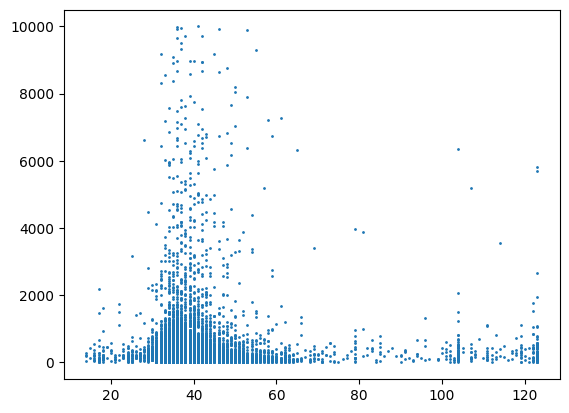

In [38]:
print('Scatter plot - age to friends_count')
plt.scatter(df['age'], df['friends_count'], s=1)
